In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("all_merged_cleaned_standardized.csv")
sns.set(style="whitegrid")

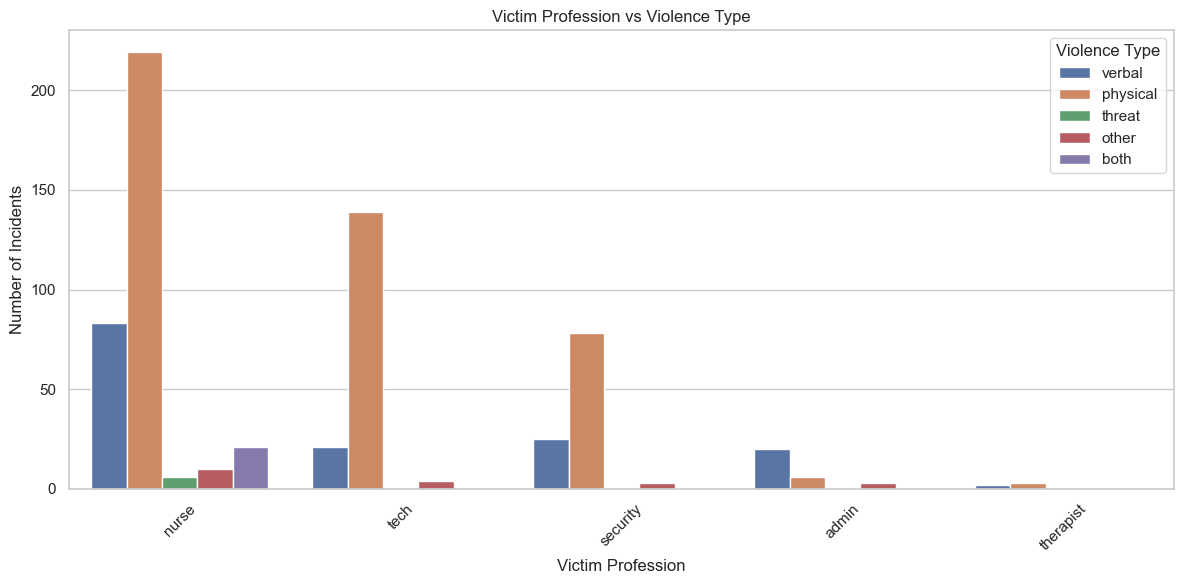

In [3]:
# Victim Profession Distribution
plt.figure(figsize=(12, 6))
subset = df[df["victim_profession"].str.lower() != "other"]
order = subset["victim_profession"].value_counts().index 
sns.countplot(data=subset, x="victim_profession", hue="violence_type", order=order)
plt.title("Victim Profession vs Violence Type")
plt.xticks(rotation=45)
plt.xlabel("Victim Profession")
plt.ylabel("Number of Incidents")
plt.legend(title="Violence Type")
plt.tight_layout()
plt.savefig("./imgs/victim_profession_vs_violence_type.png", dpi=300)
plt.show()

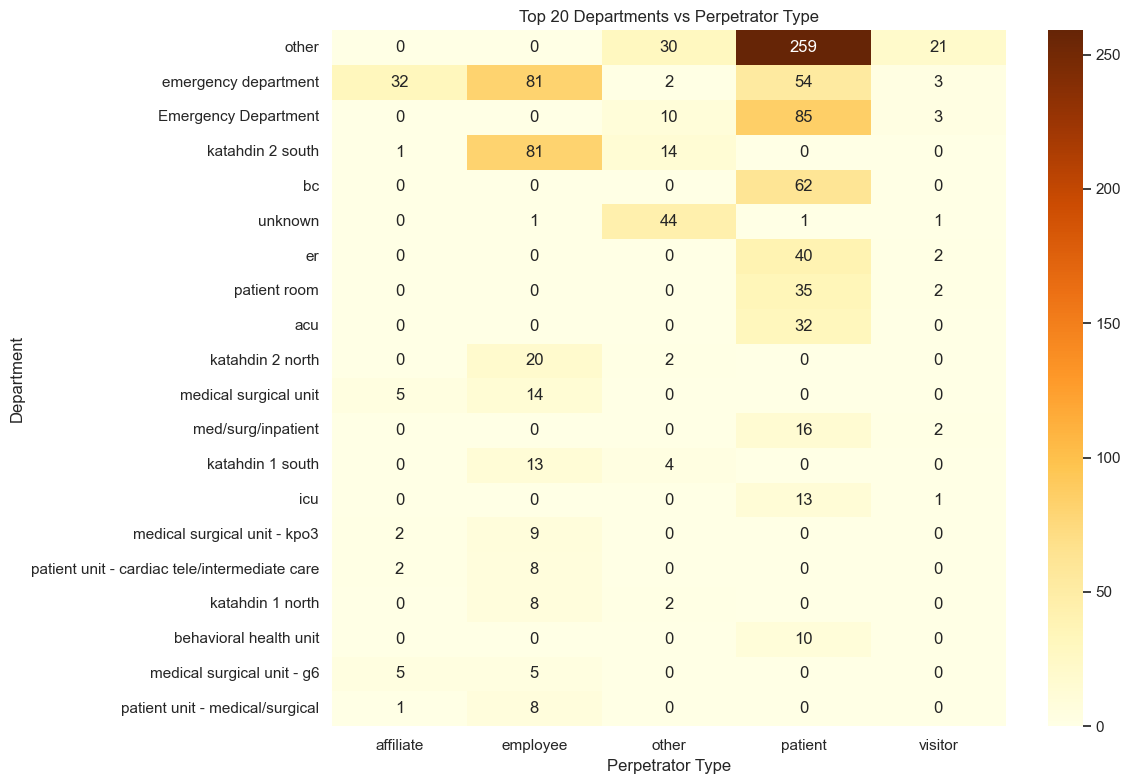

In [4]:
# Department vs Perpetrator Type

dept_perp_matrix = df.pivot_table(index="department", columns="perpetrator_type", aggfunc="size", fill_value=0)

top_departments = dept_perp_matrix.sum(axis=1).sort_values(ascending=False).head(20).index
filtered_matrix = dept_perp_matrix.loc[top_departments]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_matrix, annot=True, fmt="d", cmap="YlOrBr")
plt.title("Top 20 Departments vs Perpetrator Type")
plt.xlabel("Perpetrator Type")
plt.ylabel("Department")
plt.tight_layout()
plt.savefig("./imgs/department_vs_perpetrator_type_heatmap.png", dpi=300)
plt.show()

/var/folders/dy/69n2ngkd2cl63z8kpw_sq6q40000gn/T/ipykernel_68563/1875674732.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_combos.index, x=top_combos.values, palette="viridis")


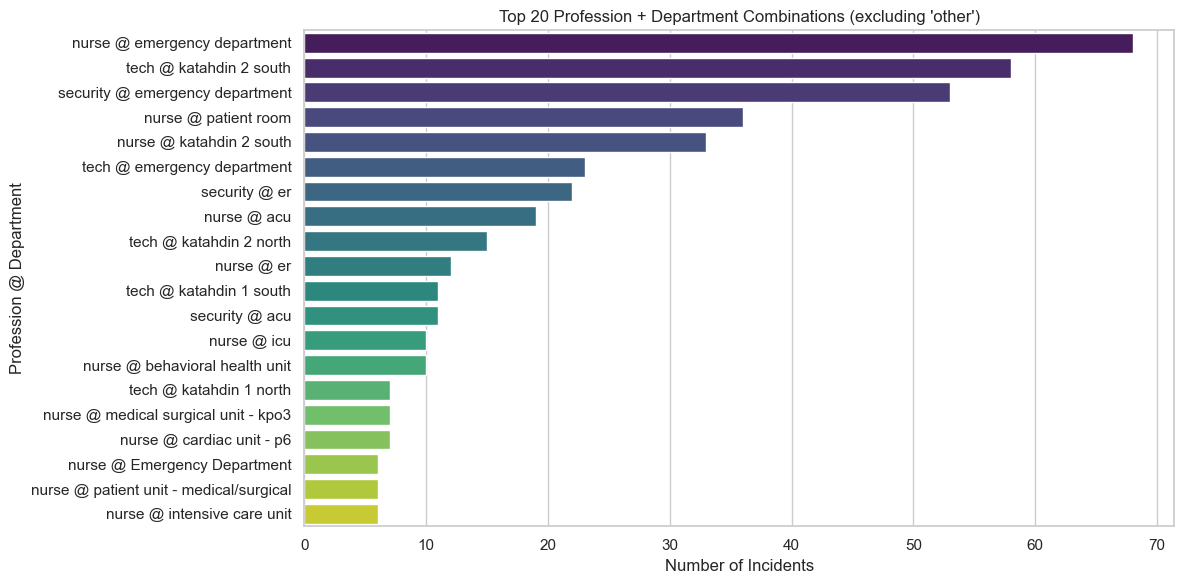

In [5]:
# victim_profession + department Top-N
subset = df[
    (df["victim_profession"].str.lower() != "other") &
    (df["department"].str.lower() != "other")
].copy()

subset["profession_department"] = subset["victim_profession"] + " @ " + subset["department"]

top_combos = subset["profession_department"].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_combos.index, x=top_combos.values, palette="viridis")
plt.title("Top 20 Profession + Department Combinations (excluding 'other')")
plt.xlabel("Number of Incidents")
plt.ylabel("Profession @ Department")
plt.tight_layout()
plt.savefig("./imgs/top_20_profession_department_combinations_filtered.png", dpi=300)
plt.show()


<Figure size 1200x800 with 0 Axes>

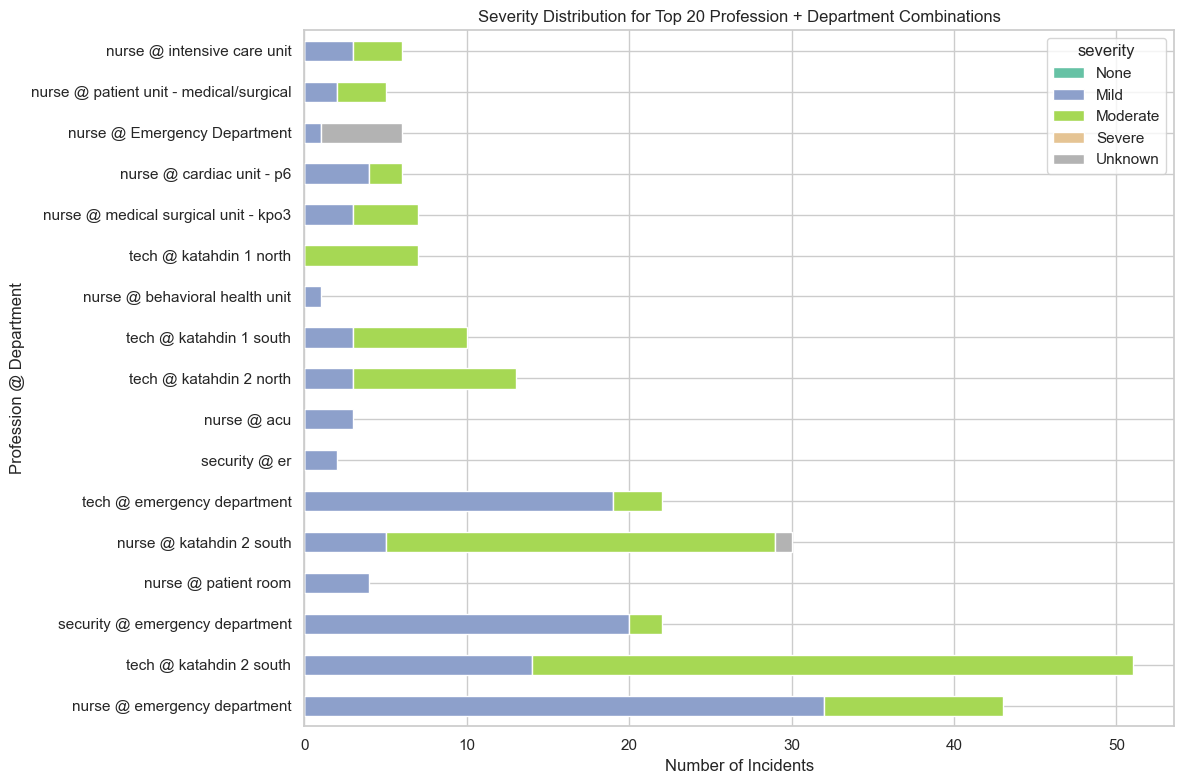

In [6]:
subset = df[
    (df["victim_profession"].str.lower() != "other") &
    (df["department"].str.lower() != "other")
].copy()

subset["profession_department"] = subset["victim_profession"] + " @ " + subset["department"]


combo_severity = subset.pivot_table(
    index="profession_department",
    columns="severity",
    aggfunc="size",
    fill_value=0
)

top_combos_raw = subset["profession_department"].value_counts().head(20).index
top_combos = [c for c in top_combos_raw if c in combo_severity.index]

combo_severity_top = combo_severity.loc[top_combos]

severity_order = ["None", "Mild", "Moderate", "Severe", "Unknown"]
combo_severity_top = combo_severity_top.reindex(columns=severity_order, fill_value=0)

plt.figure(figsize=(12, 8))
combo_severity_top.plot(
    kind="barh",
    stacked=True,
    figsize=(12, 8),
    colormap="Set2"
)
plt.title("Severity Distribution for Top 20 Profession + Department Combinations")
plt.xlabel("Number of Incidents")
plt.ylabel("Profession @ Department")
plt.tight_layout()
plt.savefig("./imgs/top_20_profession_department_severity_distribution.png", dpi=300)
plt.show()

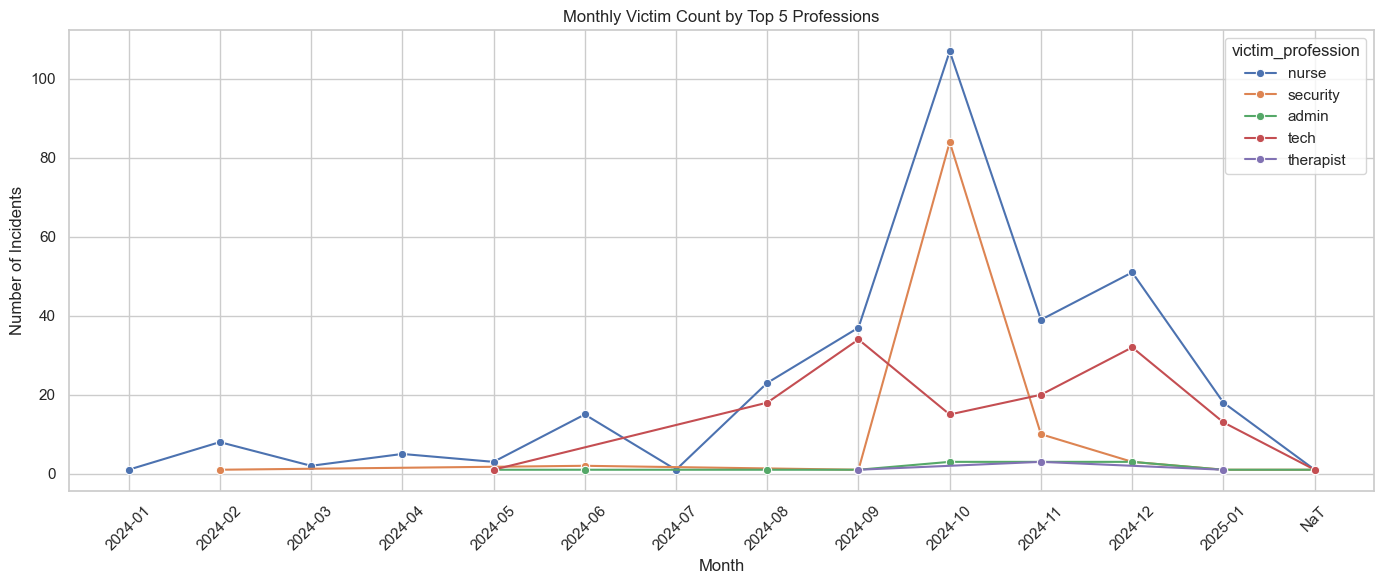

In [7]:
# Monthly Victim Count by Top 5 Professions
df["event_time"] = pd.to_datetime(df["event_time"], errors="coerce")

df["event_month"] = df["event_time"].dt.to_period("M").astype(str)

subset = df[
    (df["victim_profession"].str.lower() != "other") &
    (df["department"].str.lower() != "other")
].copy()

top_professions = subset["victim_profession"].value_counts().head(5).index
monthly_victim_counts = subset[subset["victim_profession"].isin(top_professions)] \
    .groupby(["event_month", "victim_profession"]).size().reset_index(name="count")

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_victim_counts, x="event_month", y="count", hue="victim_profession", marker="o")
plt.title("Monthly Victim Count by Top 5 Professions")
plt.xlabel("Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("./imgs/monthly_victim_count_top_5_professions.png", dpi=300)
plt.show()